# Case Study on Supervised Learning
**Sreehari P S**<br>
*NORKA B5*
***

**Problem Statement:** <br>
Do the following in the iris dataset.<br>
1. Read the dataset to the python environment.<br>
2. Do necessary pre-processing steps.<br>
3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Load data into the python environment
***

In [2]:
data = pd.read_excel('./datasets/iris_week11.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.Classification.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

From the above result it can be concluded that the above problem statement belongs to **"Multi-Class Classification Problem"**

### 2. Pre-processing
***

In [4]:
# shape
data.shape

(150, 5)

In [5]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


There are 4 columns in iris dataset out of which the predictor column 'Classification' belongs to object type. Rest columns belongs to float

In [6]:
# check for null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are null values present in dataset

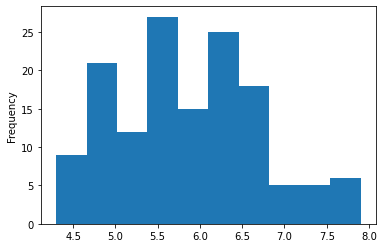

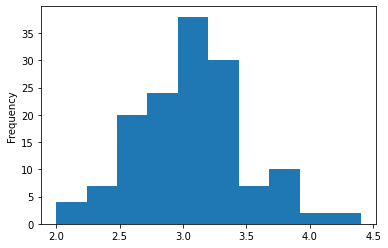

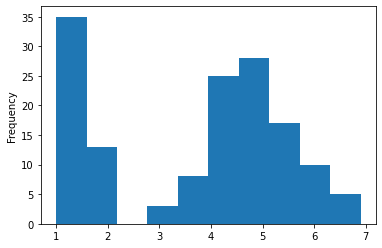

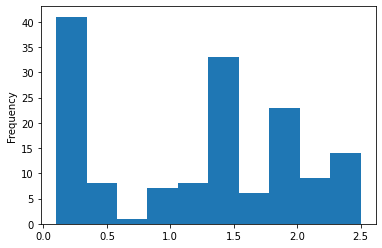

In [7]:
for column in data.columns[:-1]:
    data[column].plot.hist()
    plt.show()

From the histogram it is clear that columns in dataset are almost normally distributed, so null values can be replaced with mean

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SL,143.0,5.855944,0.828168,4.3,5.1,5.80,6.4,7.9
SW,144.0,3.049306,0.430644,2.0,2.8,3.00,3.3,4.4
PL,144.0,3.756250,1.761306,1.0,1.6,4.35,5.1,6.9
PW,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [9]:
# Filling missing values
for column in data.columns[:-1]:
    data[column].fillna(round(data[column].mean(), 1), inplace= True)

In [10]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

All the null values have been removed

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SL,150.0,5.858000,0.808534,4.3,5.2,5.8,6.400,7.9
SW,150.0,3.047333,0.421995,2.0,2.8,3.0,3.275,4.4
PL,150.0,3.758000,1.725500,1.0,1.6,4.2,5.100,6.9
PW,150.0,1.198667,0.763161,0.1,0.3,1.3,1.800,2.5


Filling with mean didnot introduce observable change in dataset

In [12]:
# Label Encode 'Classification' Column
from sklearn.preprocessing import LabelEncoder
data['Classification'] = LabelEncoder().fit_transform(data['Classification'])

In [13]:
data.Classification.value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

### 3. Model Building
***

In [14]:
# Function to check model performances
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
def check_model_metrices(y_test, y_pred):
    print('Model Accuracy = ', accuracy_score(y_test, y_pred))
    print('Model Precision = ', precision_score(y_test, y_pred, average='micro'))
    print('Model Recall = ', recall_score(y_test, y_pred, average='micro'))
    print('Model F1 Score = ', f1_score(y_test, y_pred, average='micro'))
    print('Confusion Matrix = \n', confusion_matrix(y_test, y_pred))

In [15]:
# feature selection
X = data[data.columns[:-1]] # features
y = data['Classification'] # target
print(f'Feature shape: {X.shape}')

Feature shape: (150, 4)


In [16]:
# Spliting to training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (105, 4)
X_test shape: (45, 4)


#### Model 1: Multinominal Logistic Regression
***

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg') # solver = Algorithm to use in the optimization
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [18]:
check_model_metrices(y_test, lr_pred)

Model Accuracy =  0.9777777777777777
Model Precision =  0.9777777777777777
Model Recall =  0.9777777777777777
Model F1 Score =  0.9777777777777777
Confusion Matrix = 
 [[18  1  0]
 [ 0 13  0]
 [ 0  0 13]]


**Logistic Regression classifier has predicted with an accuracy of 97.7% with just 1 misclassification.**

#### Model 2: k-Nearest Neighbors
***

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
def generate_kNN_model(x_train, y_train, x_test, k):
    knn_model = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn_model.fit(x_train, y_train)
    return knn_model.predict(x_test)

# Optimizing 'k' or 'n-neighbers' value
def find_optimal_k(x_train, y_train, x_test):
    accur_dict = dict()
    for k in np.arange(3,16):
        y_pred = generate_kNN_model(x_train, y_train, x_test, k)
        accur_dict[k] = accuracy_score(y_test, y_pred)
    #Plot
    plt.plot(list(accur_dict.keys()),list(accur_dict.values()), marker ='o')
    plt.title('k-Values vs Accuracy')
    plt.show()
    optimal_k = max(accur_dict, key = lambda x: accur_dict[x])
    print('Best k value = ', optimal_k)
    return optimal_k

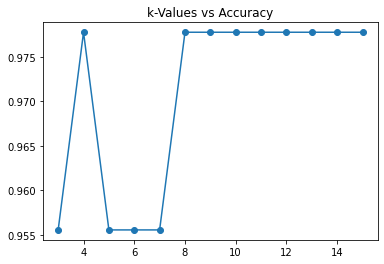

Best k value =  4
kNN classifier with k = 4 has :: 

Model Accuracy =  0.9777777777777777
Model Precision =  0.9777777777777777
Model Recall =  0.9777777777777777
Model F1 Score =  0.9777777777777777
Confusion Matrix = 
 [[18  1  0]
 [ 0 13  0]
 [ 0  0 13]]


In [21]:
# Find Optimal k value
k_optimal = find_optimal_k(X_train, y_train, X_test)
knn_y_pred = generate_kNN_model(X_train, y_train, X_test, k_optimal)
print(f'kNN classifier with k = {k_optimal} has :: \n')
check_model_metrices(y_test, knn_y_pred)

**kNN classifier has predicted with an accuracy of 97.7% with just 1 misclassification.**

#### Model 3: SVM with multi-class
***

In [22]:
from sklearn.svm import SVC
linear = SVC(kernel='linear', decision_function_shape='ovo') # decision_function_shape is set to One-vs_One for multi-class
linear.fit(X_train, y_train)
linear_pred = linear.predict(X_test)

In [23]:
check_model_metrices(y_test, linear_pred)

Model Accuracy =  1.0
Model Precision =  1.0
Model Recall =  1.0
Model F1 Score =  1.0
Confusion Matrix = 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


**Perfect Model**

In [24]:
rbf = SVC(kernel='rbf', decision_function_shape='ovo') # decision_function_shape is set to One-vs_One for multi-class
rbf.fit(X_train, y_train)
rbf_pred = rbf.predict(X_test)

In [25]:
check_model_metrices(y_test, rbf_pred)

Model Accuracy =  0.9777777777777777
Model Precision =  0.9777777777777777
Model Recall =  0.9777777777777777
Model F1 Score =  0.9777777777777777
Confusion Matrix = 
 [[18  1  0]
 [ 0 13  0]
 [ 0  0 13]]


In [26]:
poly = SVC(kernel='poly', degree = 3, decision_function_shape='ovo') # decision_function_shape is set to One-vs_One for multi-class
poly.fit(X_train, y_train)
poly_pred = poly.predict(X_test)

In [27]:
check_model_metrices(y_test, poly_pred)

Model Accuracy =  0.9777777777777777
Model Precision =  0.9777777777777777
Model Recall =  0.9777777777777777
Model F1 Score =  0.9777777777777777
Confusion Matrix = 
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


**SVC linear has predicted with an accuracy of 100% and other (poly, rbf) with just 1 misclassification.**

#### Model 4: Decision Trees
***

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [29]:
check_model_metrices(y_test, dt_pred)

Model Accuracy =  1.0
Model Precision =  1.0
Model Recall =  1.0
Model F1 Score =  1.0
Confusion Matrix = 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


**Perfect Model**

**Decision Tree has predicted with an accuracy of 100%**

#### Model 5: Random Forest
***

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [31]:
check_model_metrices(y_test, rf_pred)

Model Accuracy =  1.0
Model Precision =  1.0
Model Recall =  1.0
Model F1 Score =  1.0
Confusion Matrix = 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


**Perfect Model**

**Random Forest has predicted with an accuracy of 100%**
***

## <u>Final Verdict</u>
The best performing models are:<br>
1. Multi-Class SVM with linear kernal<br>
2. Decision Tree<br>
3. Random Forest<br>
All the above 3 alogorithms scored perfect scores in all 4 tests
***